<p align="center">
  <img src="ufQ7zJsB7fRcdMwD3nkz2M.jpg" width=500 height=333 class="center" />
</p>



# Python Data Analysis of Major Spaceflight Milestones
## A Python Project by Ian Takaoka

## Introduction

*Since 1961, **600 humans** have achieved spaceflight from **37 countries**, and this number increases yearly.*
*This project aims to use Python with Wikipedia integration to provide information and useful statistics on some of these astronauts.*

Credits: Mariya Stavnichuk and Tatsuya Corlett (original database), Georgios Karamanis via Kaggle (for csv)

### From the author: 
>*"This database contains publically available information about all astronauts who participated in space missions before 15 January 2020 collected from NASA, Roscosmos, and fun-made websites. The provided information includes full astronaut name, sex, date of birth, nationality, military status, a title and year of a selection program, and information about each mission completed by a particular astronaut such as a year, ascend and descend shuttle names, mission and extravehicular activity (EVAs) durations."*

### Limitations (from me): 
This dataset only has years and not calendar dates, leaving me with limited capability to show change over time. The dataset also does not include spaceflight statistics after January 2020. As the Soviet Union did not distinguish between nationalities within its borders, the USSR/Russia field may include cosmonauts from other Soviet Republics and not specifically from the Russian SFSR. Additionally, no commercial astronauts are listed, as SpaceX's Crew Dragon Demo-2, the first manned commercial spaceflight, did not launch until May 2020. 

## Data Import



In [ ]:
import pandas as pd
import numpy as np

##Will return info from Wikipedia about specific individuals. Make sure to pip install wikipedia before proceeding with this program
import wikipedia as wiki

from matplotlib import pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'


pd.set_option('chained_assignment',None)


astronaut_raw = pd.read_csv('astronauts.csv')
astronaut_raw.drop_duplicates(subset=['name' , 'original_name'], keep= 'first')

## Astronaut Background

The Soviet Union was the first nation to achieve manned spaceflight in 1961. Since then, 37 countries have sent humans to space. During the Space Race, the first astronauts and cosmonauts were primarily drawn from the . Specifically, due to the highly experimental nature of early manned spaceflight, the first astronauts were almost exclusively test pilots from the armed forces of their respective countries. Civilians were eventually drawn into the space program, typically highly degreed scientists as mission or payload specialists. Currently, NASA maintains that Astronaut Candidates (ASCANs) must have at least a Master's degree in a Science, Technology, Engineering, and Mathematics (STEM) field and extensive professional experience, or 1000 hours of pilot command time in jet aircraft. Meanwhile, the Soviet Union and the Russian Federation both drew more heavily from their armed forces, with most Soviet Cosmonauts being active duty servicemen from the Soviet Air Force. 

Astronauts from other countries have accompanied both American and Russian spaceflights. The Soviet Union invited experts from Communist Bloc-aligned countries to act as payload specialists via a program known as Interkosmos.  Until the deactivation of the Space Shuttle fleet, NASA regularly invited scientists and experts from Western-aligned countries as mission specialists on their own missions. Currently, all astronauts bound for the International Space Station travel on Russian Soyuz spacecraft at the invitation of the Russian government, though some have been taken by the private company SpaceX as of 2022.

The first woman in space was 26 year-old **Valentina Tereshkova** of the Soviet Union. In general, women have been historically less represented in spaceflight. While the Soviet Union initially led the world in spaceflight milestones for women, the Soviet Space Program lagged behind the United States and internationally, and in total the Soviet Union only sent 3 women to space. Roscosmos, Russia's current space agency, has likewise only sent a handful of women to space. Meanwhile, NASA Astronaut Group 8 was the first to include women, and only one Astronaut Group has included an equal number of men and women. The upcoming Artemis program has a stated aim to increase representation of women and minorities, and it is believed that the first woman to land on the moon will be part of this program. 

Author's note: In this dataset, some astronauts were of dual nationalities or different nationalities than the mission in which they participated - such is the case with Anglo-American space tourist **Richard Garriott**, and the Ukrainian astronaut **Leonid Kadenyuk**, who was originally a cosmonaut in the Soviet space program before ultimately flying aboard Space Shuttle Columbia as member of NASA. 

In [ ]:
##This dataframe needs to remove duplicates, as many astronauts went to space more than once. 
df1 = astronaut_raw[['name', 'nationality', 'year_of_mission', 'mission_title']]
nations = df1.drop_duplicates(subset ='name', keep = 'first') 
nations_counts=nations['nationality'].value_counts()
ax = nations_counts.plot(kind = "pie", figsize = [24, 12], legend = True, shadow = True, 
title = 'Nationality of Astronauts', fontsize = 40, ylabel=' ', labeldistance = None)
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
ax.title.set_size(40)
plt.show();



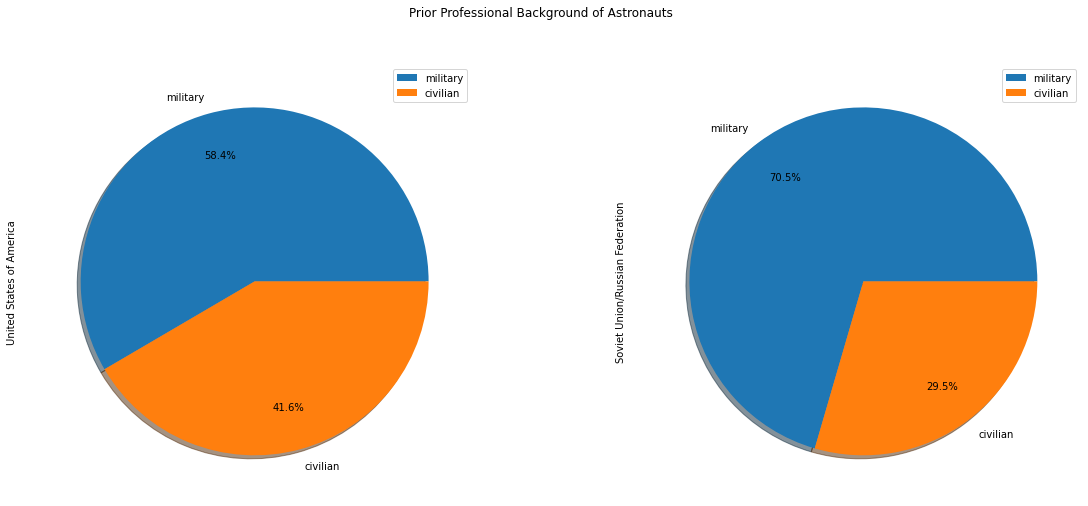

In [589]:
milciv = astronaut_raw[['name', 'nationality', 'military_civilian']].drop_duplicates(subset ='name', keep = 'first') 
milciv_us = milciv[milciv['nationality'].str.contains('U.S.A')==True]
milciv_us_data = milciv_us['military_civilian'].value_counts()

milciv_ru = milciv[milciv['nationality'].str.contains('U.S.S.R/Russia')==True]
milciv_rs_data = milciv_ru['military_civilian'].value_counts()

milax = pd.concat([milciv_us_data, milciv_rs_data], axis=1, keys=['United States of America', 'Soviet Union/Russian Federation'])
axes = milax.plot(kind='pie', figsize=[20, 8], autopct='%1.1f%%', pctdistance=0.75, title = 'Prior Professional Background of Astronauts', 
shadow = True, subplots=True);
for ax in axes:
    ax.set_aspect('equal')
    ax.yaxis.labelpad = 20


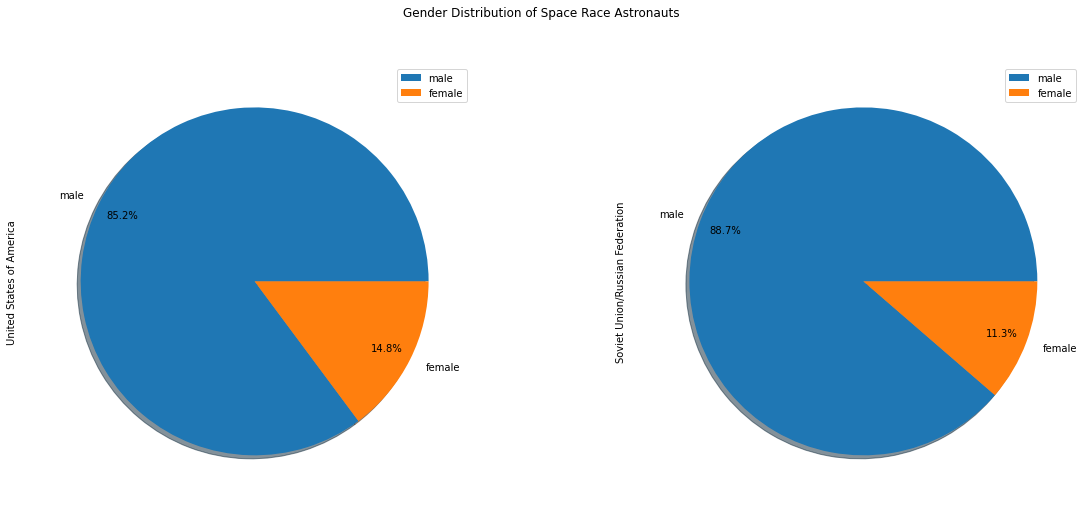

In [590]:
sex = astronaut_raw[['name', 'nationality', 'sex']].drop_duplicates(subset ='name', keep = 'first') 
sex_us = sex[sex['nationality'].str.contains('U.S.A')==True]
sex_us_data = sex_us['sex'].value_counts()

sex_ru = sex[sex['nationality'].str.contains('U.S.S.R/Russia')==True]
sex_rs_data = sex['sex'].value_counts()

sexax = pd.concat([sex_us_data, sex_rs_data], axis=1, keys=['United States of America', 'Soviet Union/Russian Federation'])
axes = sexax.plot(kind = 'pie', figsize= [20, 8], autopct ='%1.1f%%', pctdistance=0.75, title = 'Gender Distribution of Space Race Astronauts', 
shadow = True, subplots = True);
for ax in axes:
    ax.set_aspect('equal')
    ax.yaxis.labelpad = 20

## Astronaut Age
Due to the rigorous professional expectations of astronaut candidates, this tends to skew average astronaut ages at selection to early 30s, with crew selections set years in advance of mission launch to allow for adequate training and mission control experience. Thus, many astronauts are in their early 40s at mission launch. 

The youngest astronauts at time of selection were the Soviet cosmonauts **Pyotr Klimuk** , **Gennady Sarafanov** and **Vyacheslav Zudov,** who were each 23 years old. The youngest humans to achieve spaceflight were Soviet cosmonauts **Gherman Titov** and **Valentina Tereshkova**, each at 26 years old. 32 year old **Sally Ride** is the youngest American to achieve spaceflight.

Private citizen **Dennis Tito** at 60 years old currently holds the record for oldest astronaut at selection, while American career astronaut **John Glenn** is the oldest astronaut at time of launch at 77 years old*.

<sub><sup>As of 2022, 90-year old actor William Shatner surpassed John Glenn as the oldest human in space with Blue Origin. As mentioned previously, this is beyond the scope of the dataset</sup></sub>

### Age At Selection

In [591]:
df2 = astronaut_raw[['name', 'year_of_birth', 'year_of_selection', 'nationality', 'selection']]

df2['age_at_selection'] = df2['year_of_selection'] - df2['year_of_birth']

df2.drop_duplicates(subset=['name'], keep= 'first');

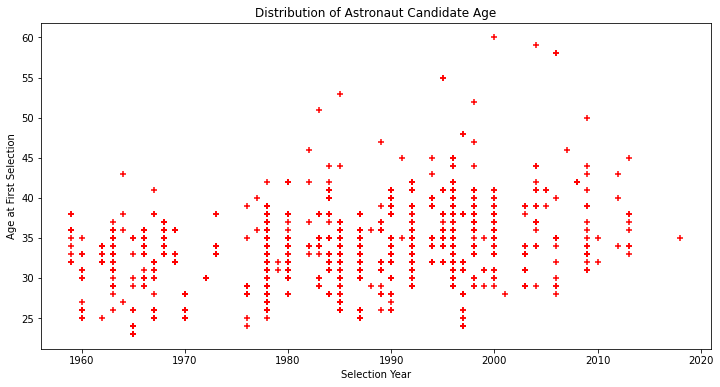

In [592]:
selection_year = df2[['year_of_selection']].to_numpy()
selection_age = df2[['age_at_selection']].to_numpy()
plt.figure(figsize = (12, 6))
plt.scatter(selection_year, selection_age, marker= '+', color = 'red')
plt.xlabel('Selection Year')
plt.ylabel('Age at First Selection')
plt.title('Distribution of Astronaut Candidate Age')
plt.show();

#### Mean Age of Astronauts at Time of Selection

In [593]:
df2_mean = (df2.age_at_selection.mean())
print('The average age of all astronaut candidates prior to 2020 is ' + str(round(df2_mean)) + ' ' + 'years old.' )

The average age of all astronaut candidates prior to 2020 is 34 years old.


#### Youngest Astronauts at Time of Selection

In [594]:
df2_youngest = (df2[df2.age_at_selection == df2.age_at_selection.min()])
df2_youngest.drop_duplicates(subset=['name'], keep= 'first').style.hide_index()

name,year_of_birth,year_of_selection,nationality,selection,age_at_selection
"Klimuk, Pyotr",1942,1965,U.S.S.R/Russia,TsPK-3,23
"Sarafanov, Gennadi",1942,1965,U.S.S.R/Russia,TsPK-3,23
"Zudov, Vyacheslav",1942,1965,U.S.S.R/Russia,TsPK-3,23


#### Oldest Astronauts at Time of Selection

In [595]:
df2_oldest = (df2[df2.age_at_selection == df2.age_at_selection.max()])
df2_oldest.drop_duplicates(subset=['name'], keep= 'first').style.hide_index()
wiki.summary(df2_oldest['name'])

name,year_of_birth,year_of_selection,nationality,selection,age_at_selection
"Tito, Dennis Anthony",1940,2000,U.S.A,MirCorp,60


'Dennis Anthony Tito (born August 8, 1940) is an American engineer, entrepreneur and astronaut. In mid-2001, he became the first space tourist to fund his own trip into space, when he spent nearly eight days in orbit as a crew member of ISS EP-1, a visiting mission to the International Space Station. This mission was launched by the spacecraft Soyuz TM-32, and was landed by Soyuz TM-31.\n\n'

### Age at Spaceflight

In [596]:
df3 = astronaut_raw[['name', 'year_of_birth', 'year_of_mission', 'nationality', 'mission_title']]

df3['age_at_mission'] = df3['year_of_mission'] - df3['year_of_birth']

df3;

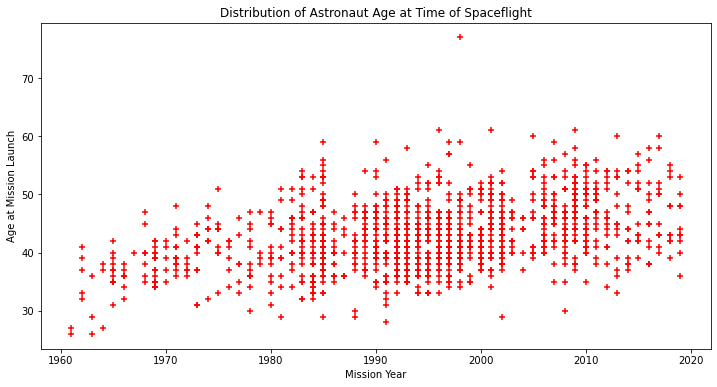

In [597]:
mission_year = df3[['year_of_mission']].to_numpy()
mission_age = df3[['age_at_mission']].to_numpy()
plt.figure(figsize = (12, 6))
plt.scatter(mission_year, mission_age, marker= '+', color = 'red')
plt.xlabel('Mission Year')
plt.ylabel('Age at Mission Launch')
plt.title('Distribution of Astronaut Age at Time of Spaceflight')
plt.show();

#### Mean Age of Astronauts who have Achieved Spaceflight

In [598]:
df3_mean = (df3.age_at_mission.mean())
print('The average age of all astronauts at mission launch prior to 2020 is ' + str(round(df3_mean)) + ' ' + 'years old.' )

The average age of all astronauts at mission launch prior to 2020 is 43 years old.


#### Youngest Astronauts at Mission Launch

In [599]:
df3_youngest = (df3[df3.age_at_mission == df3.age_at_mission.min()])
df3_youngest.drop_duplicates(subset=['name'], keep= 'first').style.hide_index()
wiki.summary(df3_youngest['name'], sentences=3)

name,year_of_birth,year_of_mission,nationality,mission_title,age_at_mission
"Titov, Gherman",1935,1961,U.S.S.R/Russia,Vostok 2,26
"Tereshkova, Valentina",1937,1963,U.S.S.R/Russia,Vostok 6,26


'Valentina Vladimirovna Tereshkova (Russian: Валентина Владимировна Терешкова, IPA: [vɐlʲɪnʲˈtʲinə vlɐˈdʲimʲɪrəvnə tʲɪrʲɪʂˈkovə] (listen); born 6 March 1937) is an engineer, member of the Russian State Duma, and former Soviet cosmonaut. She is known for being the first and youngest woman in space, having flown a solo mission on the Vostok 6 on 16 June 1963. She orbited the Earth 48 times, spent almost three days in space, and remains the only woman to have been on a solo space mission.'

#### Oldest Astronaut at Mission Launch

In [600]:
df3_oldest = (df3[df3.age_at_mission == df3.age_at_mission.max()])
df3_oldest.drop_duplicates(subset=['name'], keep= 'first').style.hide_index()
wiki.summary(df3_oldest['name'], sentences=4)

name,year_of_birth,year_of_mission,nationality,mission_title,age_at_mission
"Glenn, John H., Jr.",1921,1998,U.S.A,STS-95,77


'John Herschel Glenn Jr. (July 18, 1921 – December 8, 2016) was an American aviator in the United States Marine Corps, engineer, astronaut, businessman, and politician. He was the third American in space, and the first American to orbit the Earth, circling it three times in 1962. Following his retirement from NASA, he served from 1974 to 1999 as a Democratic United States Senator from Ohio; in 1998, he flew into space again at age 77.'

## Spaceflight Duration Milestones

### Most Missions

In [601]:
df4 = astronaut_raw[['name', 'nationality','total_number_of_missions']].drop_duplicates(subset=['name'], keep= 'first')
df4_mostmissions = df4.nlargest(20, 'total_number_of_missions')
df4_mostmissions.style.hide_index()


name,nationality,total_number_of_missions
"Ross, Jerry L.",U.S.A,7
"Chang-Diaz, Franklin R.",U.S.A,7
"Young, John W.",U.S.A,6
"Musgrave, Franklin Story",U.S.A,6
"Krikalev, Sergei",U.S.S.R/Russia,6
"Wetherbee, James D.",U.S.A,6
"Foale, C. Michael",U.S.A,6
"Brown, Curtis L., Jr.",U.S.A,6
"Malenchenko, Yuri",U.S.S.R/Russia,6
"Dzhanibekov, Vladimir",U.S.S.R/Russia,5


### Cumulative Spaceflight Hours

In [602]:
df5 = astronaut_raw[['name', 'nationality','total_hrs_sum']].drop_duplicates(subset=['name'], keep= 'first')
df5_mosttime = df5.nlargest(20, 'total_hrs_sum')
df5_mosttime.style.hide_index()
wiki.summary(df5.nlargest(1, 'total_hrs_sum')['name'], sentences=2)

name,nationality,total_hrs_sum
"Padalka, Gennady",U.S.S.R/Russia,21083.520000
"Krikalev, Sergei",U.S.S.R/Russia,19281.650000
"Kaleri, Aleksandr",U.S.S.R/Russia,18462.620000
"Avdeyev, Sergei",U.S.S.R/Russia,17942.230000
"Malenchenko, Yuri",U.S.S.R/Russia,16872.470000
"Polyakov, Valeri",U.S.S.R/Russia,16288.530000
"Yurchikhin, Fyodor",U.S.S.R/Russia,16147.000000
"Kononenko, Oleg D.",U.S.S.R/Russia,16081.000000
"Whitson, Peggy A.",U.S.A,15982.000000
"Solovyev, Anatoly",U.S.S.R/Russia,15624.030000


'Gennady Ivanovich Padalka (Russian: Гeннадий Иванович Падалка; born 21 June 1958 in Krasnodar, Soviet Union) is a Russian Air Force officer and a Roscosmos cosmonaut. Padalka currently holds the world record for the most time spent in space, at 879 days.'

### Longest Missions

In [603]:
df6 = astronaut_raw[['name', 'nationality', 'year_of_mission', 'mission_title', 'in_orbit', 'hours_mission']].drop_duplicates(subset=['name'], keep= 'first')
df6_longestmissions = df6.nlargest(20, 'hours_mission')
df6_longestmissions.style.hide_index()
wiki.summary(df6.nlargest(1, 'hours_mission')['name'], sentences=2)

name,nationality,year_of_mission,mission_title,in_orbit,hours_mission
"Ryzhikov, Sergey",U.S.S.R/Russia,2016,49,ISS,10383.250000
"Manarov, Musa",U.S.S.R/Russia,1987,3,Mir,8782.000000
"Koch, Christina",U.S.A,2019,59,ISS,7372.300000
"Onishi, Takuya",Japan,2016,48,ISS,6902.350000
"Rubins, Kathleen",U.S.A,2016,48,ISS,6902.350000
"Polyakov, Valeri",U.S.S.R/Russia,1988,3,Mir,5782.000000
"Solovyov, Vladimir",U.S.S.R/Russia,1984,Salyut 7,Salyut 7,5686.000000
"Atkov, Oleg",U.S.S.R/Russia,1984,Salyut 7,Salyut 7,5686.000000
"Berezovoy, Anatoly",U.S.S.R/Russia,1982,Salyut 7,Salyut 7,5073.000000
"Saint-Jaques, David",Canada,2018,57,ISS,4887.000000


'Sergey Nikolayevich Ryzhikov (Russian: Сергей Николаевич Рыжиков; born on 19 August 1974), lieutenant colonel of Russian Air Force, is a Russian cosmonaut, selected in 2006. \nHe is a veteran of two long duration space flights to the ISS.\n\n\n== Early life and education ==\nRyzhikov was born on 19 August 1974 in Bugulma, Tatar Autonomous Soviet Socialist Republic.'

### Longest Missions (SPACE STATIONS EXCLUDED)

In [604]:
df6_nospacestations = df6[df6['in_orbit'].str.contains("ISS|Mir|Salyut|Skylab")==False]
df6_longestmissions_nospacestations = df6_nospacestations.nlargest(20, 'hours_mission')
df6_longestmissions_nospacestations.style.hide_index()
wiki.summary(df6_nospacestations.nlargest(1, 'hours_mission')['name'], sentences=2)

name,nationality,year_of_mission,mission_title,in_orbit,hours_mission
Arnaldo Tamayo Mendez,Cuba,1980,Soyuz 38,Soyuz 38,1887.710000
"Chen, Dong",China,2016,Shenzhou 11,Shenzhou 11,774.500000
"Kerwin, Joseph P.",U.S.A,1973,Skylab 2,Apollo Sk.2,672.000000
"Eyharts, Léopold",France,1998,Soyuz TM-27/26,Soyuz TM-27,496.500000
"Haigneré, Jean-Pierre",France,1993,Soyuz TM-17 / Soyuz TM-16,Soyuz TM-17,496.000000
"Ewald, Reinhold",Germany,1997,Soyuz TM-25/24,Soyuz TM-25,472.570000
"Sevastyanov, Vitali",U.S.S.R/Russia,1970,Soyuz 9,Soyuz 9,424.000000
"Favier, Jean-Jacques",France,1996,STS-78,STS-78,405.800000
Robert Thirsk,Canada,1996,STS-78,STS-78,405.800000
"Linnehan, Richard M.",U.S.A,1996,STS-78,STS-78,405.000000


'Arnaldo Tamayo Méndez (born January 29, 1942) is a Cuban military officer, legislator, and former cosmonaut and the first person of African heritage in space. In 1980, as a member of the crew of Soyuz 38, he became the first Cuban citizen, the first Latin American, the first person of African descent, and the first person from a country in the Western Hemisphere other than the United States to travel into Earth orbit.'

### Extravehicular Activity
Extravehicular activity (often called spacewalk) refers to the time spent by an astronaut outside of their spacecraft while in spaceflight. The first EVA was performed by Soviet cosmonaut Alexei Leonov in 1965, and Neil Armstrong became the first person to leave his vehicle on another planetary body in 1969. While safeguards are in place and all astronauts undergo training to perform zero-gravity maneuvers in pressure suits, EVA carries extremely high risk to the astronaut, and as such not all astronauts are relied upon to perform tasks outside their spacecraft. 

In [605]:
df7 = astronaut_raw[['name', 'nationality', 'in_orbit', 'eva_hrs_mission', 
'total_eva_hrs']].drop_duplicates(subset=['name'], keep= 'first')
df7

,name,nationality,in_orbit,eva_hrs_mission,total_eva_hrs
0,"Gagarin, Yuri",U.S.S.R/Russia,Vostok 2,0.00,0.00
1,"Titov, Gherman",U.S.S.R/Russia,Vostok 2,0.00,0.00
2,"Glenn, John H., Jr.",U.S.A,MA-6,0.00,0.00
4,"Carpenter, M. Scott",U.S.A,Mercury-Atlas 7,0.00,0.00
5,"Nikolayev, Andriyan",U.S.S.R/Russia,Vostok 3,0.00,0.00
...,...,...,...,...,...
1272,"McClain, Anne Charlotte",U.S.A,ISS,13.13,13.13
1273,"Koch, Christina",U.S.A,ISS,27.80,27.80
1274,"Morgan, Andrew",U.S.A,ISS,39.52,39.52
1275,"Meir, Jessica",U.S.A,ISS,7.28,7.28


### Most EVA during Mission

In [606]:
df7_eva_longest = df7.nlargest(10, 'eva_hrs_mission')
df7_eva_longest.style.hide_index()

name,nationality,in_orbit,eva_hrs_mission,total_eva_hrs
"Morgan, Andrew",U.S.A,ISS,39.520000,39.520000
"Walheim, Rex J.",U.S.A,STS-110,34.600000,56.730000
"Artsebarsky, Anatoly",U.S.S.R/Russia,Mir,32.280000,32.280000
"Onufrienko, Yuri",U.S.S.R/Russia,Mir,30.500000,42.530000
"Williams, Sunita L.",U.S.A,ISS,28.280000,50.670000
"Koch, Christina",U.S.A,ISS,27.800000,27.800000
"Vande Hei, Mark",U.S.A,ISS,27.000000,27.000000
"Vinogradov, Pavel",U.S.S.R/Russia,Mir,25.270000,38.400000
"Solovyov, Vladimir",U.S.S.R/Russia,Salyut 7,22.830000,31.670000
"Schmitt, Harrison H.",U.S.A,Apollo 17,22.070000,22.070000


### Most EVA Hours

In [607]:
df7_eva_most = df7.nlargest(10, 'total_eva_hrs')
df7_eva_most.style.hide_index()
wiki.summary(df7.nlargest(1, 'total_eva_hrs')['name'], sentences=3)

name,nationality,in_orbit,eva_hrs_mission,total_eva_hrs
"Solovyev, Anatoly",U.S.S.R/Russia,Mir EP,0.000000,78.800000
"Lopez-Alegria, Michael E.",U.S.A,STS-73,0.000000,67.670000
"Feustel, Andrew J.",U.S.A,STS-125,21.000000,61.800000
"Whitson, Peggy A.",U.S.A,ISS,4.380000,60.310000
"Grunsfeld, John M.",U.S.A,STS-67,0.000000,59.500000
"Yurchikhin, Fyodor",U.S.S.R/Russia,STS­112,0.000000,59.430000
"Ross, Jerry L.",U.S.A,STS-61,12.200000,58.530000
"Walheim, Rex J.",U.S.A,STS-110,34.600000,56.730000
"Mastracchio, Richard A.",U.S.A,STS-106,0.000000,53.070000
"Williams, Sunita L.",U.S.A,ISS,28.280000,50.670000


'Anatoly Yakovlevich Solovyev (Russian: Анатолий Яковлевич Соловьёв; alternate spelling "Solovyov") is a retired Russian and Soviet cosmonaut and pilot. Solovyev was born on January 16, 1948, in Riga, Latvia (at that time - republic of the Soviet Union). Solovyev holds the world record on the number of spacewalks performed (16), and accumulated time spent spacewalking (over 82 hours).'